In [1]:
import sys  
#!{sys.executable} -m pip install pandas
import pandas as pd
import numpy as np

#!{sys.executable} -m pip install geopandas
import geopandas as gpd

import requests

import warnings
warnings.filterwarnings('ignore')

#!{sys.executable} -m pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

#!{sys.executable} -m pip install folium
import folium
#!{sys.executable} -m pip install geopy

import geopy.distance
import glob

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# loading all the county files
file_list = glob.glob('processed_data/selected_*_final.csv')
file_list

['processed_data/selected_nj_bg_data_final.csv',
 'processed_data/selected_LA_bg_data_final.csv',
 'processed_data/selected_HUSTON_bg_data_final.csv',
 'processed_data/selected_ny_bg_data_final.csv']

In [3]:
# selecting only few for testing
f_list_2 = ['processed_data/selected_nj_bg_data_final.csv',
 'processed_data/selected_ny_bg_data_final.csv']

In [4]:
df_list = []
for file in file_list:
    tp_df=pd.read_csv(file)
    df_list.append(tp_df)

In [5]:
# appending loaded dataframes
df=pd.concat(df_list)

In [6]:
df.COUNTY.unique()

array(['Bergen County', 'Essex County', 'Hudson County',
       'Middlesex County', 'Morris County', 'Union County',
       'Los Angeles County', 'Harris County', 'Bronx County',
       'Kings County', 'New York County', 'Queens County',
       'Richmond County'], dtype=object)

In [7]:
df.shape

(1835, 53)

### Merging Race Data

In [8]:
# adding the race information
df_race=pd.read_csv('processed_data/selected_states_race_data.csv')

In [9]:
df_race.shape

(98220, 4)

In [10]:
df=df.merge(df_race,on='GISJOIN',how='left')

In [11]:
df.shape

(1835, 56)

In [12]:
cords=df[['lat','lon']].values.tolist()

In [13]:
df.STATE.unique()

array(['New Jersey', 'California', 'Texas', 'New York'], dtype=object)

In [14]:
m = folium.Map(location=cords[0],zoom_control=3)

for point in cords:
    folium.Circle(
        radius=10,
        location=point,
        popup=str(point),#"The Waterfront",
        color="crimson",
        fill=False,).add_to(m)


m

### Analysing per County

In [15]:
res_analysis_cols =['Total_Population', 'Total_Working','Worked from home','Chinese Restaurant_count', 'Indian Restaurant_count', 'Italian Restaurant_count','Mexican Restaurant_count']


In [16]:
df.rename(columns={'income_group_<$10k':'income_group_<10k',
       'income_group_$10k_to_$25k':'income_group_10k_to_25k',
    'income_group_$25k_to_$50k':  'income_group_25k_to_50k',
       'income_group_$50k_to_$100k':'income_group_50k_to_100k',
    'income_group_$100k_to_$200k':'income_group_100k_to_200k',
                         'income_group_>$200k':'income_group_>200k'
},inplace=True)

In [17]:
income_groups= ['income_group_<10k',
       'income_group_10k_to_25k', 'income_group_25k_to_50k',
       'income_group_50k_to_100k', 'income_group_100k_to_200k',
       'income_group_>200k']

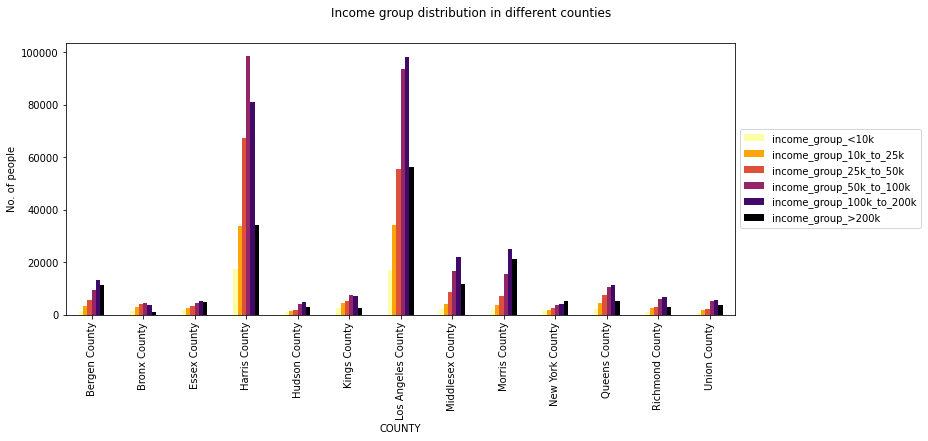

In [18]:
#  TODO : changes the inferno range
ax=df.groupby(['COUNTY'])[income_groups].sum().plot(kind='bar',figsize=(15,5),cmap='inferno_r')#.unstack(-1)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Income group distribution in different counties')
plt.ylabel('No. of people')
plt.show()

In [19]:
p1 = df.groupby(['COUNTY'])[res_analysis_cols].sum()

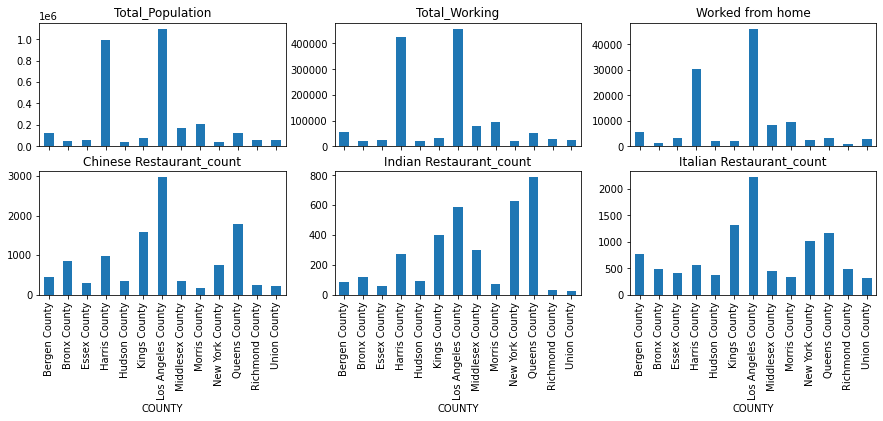

In [20]:
fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(15,5),sharex=True)
cols=p1.columns.tolist()
k=0
for i in range(2):
    for j in range(3):
        p1[cols[k]].plot(kind='bar',ax=axes[i][j])
        axes[i][j].set_title(cols[k])
        k=k+1
plt.show()

In [21]:
df.shape

(1835, 56)

In [22]:
df.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
0  G34000300021001  New Jersey      34  Bergen County        3    2100   
1  G34000300021002  New Jersey      34  Bergen County        3    2100   
2  G34000300022001  New Jersey      34  Bergen County        3    2200   
3  G34000300023002  New Jersey      34  Bergen County        3    2300   
4  G34000300031001  New Jersey      34  Bergen County        3    3100   

   BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
0          1                  119                        127   
1          2                   84                         73   
2          1                  372                        260   
3          2                  226                         84   
4          1                  274                        188   

   travel_time_>60_mins  ...  Public Transportation_count  Rail Station_count  \
0                    58  ...                          1.0                 NaN   
1                    70  ...                          NaN                 NaN   
2                   216  ...                          1.0                 NaN   
3                   194  ...                          1.0                 NaN   
4                    75  ...                          1.0                 NaN   

   Bus Stop_avg_distance  Metro Station_avg_distance  \
0                    NaN                         NaN   
1                    NaN                         NaN   
2                    NaN                         NaN   
3                    NaN                         NaN   
4                 1532.4                         NaN   

   Public Transportation_avg_distance  Rail Station_avg_distance  \
0                              1511.0                        NaN   
1                                 NaN                        NaN   
2                              1866.0                        NaN   
3                              1484.0                        NaN   
4                              1633.0                        NaN   

   Business_Parks_Count  Total_Population_Race  White alone  Asian alone  
0                   2.0                    804          523          243  
1                   2.0                    655          370          230  
2                  10.0                   1708          925          760  
3                   8.0                   1597          779          768  
4                  16.0                   1117          766          329  

[5 rows x 56 columns]

In [23]:
df = df.fillna(0)

In [24]:
df.isna().sum().sum()

0

In [25]:
df['Indo-Chinese Restaurants Count'] = df['Chinese Restaurant_count'] + df['Indian Restaurant_count']

In [56]:
debug_cols =  ['GISJOIN', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA','BLCK_GRPA','INTPTLAT','INTPTLON', 'geometry', 'lat', 'lon']

time_for_travel_cols = ['travel_time_<30mins', 'travel_time_30_to_60_mins','travel_time_>60_mins']
income_group_cols = ['income_group_<10k', 'income_group_10k_to_25k','income_group_25k_to_50k', 'income_group_50k_to_100k','income_group_100k_to_200k', 'income_group_>200k']
total_population_col = ['Total_Population', 'White alone', 'Asian alone']
mode_of_commute_col = ['Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home']
work_force_cols =[
       'In labor force', 'In labor force: Civilian labor force',
       'In labor force: Civilian labor force: Employed',
       'In labor force: Civilian labor force: Unemployed',
       'In labor force: Armed Forces', 'Not in labor force']

restaurent_cols = [ 'Chinese Restaurant_count',
       'Indian Restaurant_count', 'Italian Restaurant_count',
       'Mexican Restaurant_count', 'Chinese Restaurant_avg_distance',
       'Indian Restaurant_avg_distance', 'Italian Restaurant_avg_distance',
       'Mexican Restaurant_avg_distance']
transport_fs_cols =[ 'Bus Stop_count',
       'Metro Station_count', 'Public Transportation_count',
       'Rail Station_count', 'Bus Stop_avg_distance',
       'Metro Station_avg_distance', 'Public Transportation_avg_distance',
       'Rail Station_avg_distance']
business_park_cols =['Business_Parks_Count']
selected_cols = total_population_col#+['COUNTYA','TRACTA'] # +income_group_cols+mode_of_commute_col+work_force_cols+transport_fs_cols

#selected_cols = total_population_col #+income_group_cols#+ income_group_cols+mode_of_commute_col+work_force_cols+transport_fs_cols

target=['Indo-Chinese Restaurants Count']



model_cols = selected_cols+target

### 2 sample T- Test

In [27]:
total_population = df['Total_Population'].values#.tolist()
asian_population = df['Asian alone'].values#.tolist()

In [28]:
len(total_population),len(asian_population)

(1835, 1835)

In [29]:
#random samples
n_samples = 100
samples = np.random.choice(total_population.shape[0], n_samples, replace=False)

total_population_samples = total_population[samples]
asian_samples = asian_population[samples]

In [54]:
null_hypthesis = f'The effect of Total Population and asian population on Indo-Chinese restaurants count are equal'
alter_hypthesis = f'The effect of Total Population and asian population on Indo-Chinese restaurants count are not equal'

In [55]:
from scipy import stats

t_value,p_value=stats.ttest_ind(total_population_samples,asian_samples)

print('Test statistic: ',round(t_value,4))

print('p-value', round(p_value,4))

alpha = 0.05

if p_value<=alpha:
    print('p value <= alpha')
    print('We reject the null hypothesis:')
    print(alter_hypthesis)
else:
    print('p value > alpha')
    print('We do not reject the null hypothesis:')
    print(null_hypthesis)


Test statistic:  16.239
p-value 0.0
p value <= alpha
We reject the null hypothesis:
The effect of Total Population and asian population on Indo-Chinese restaurants count are not equal


In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans


In [33]:
df_model = df[df.STATE.isin(['New York','New Jersey'])].copy()#[df.COUNTY=='Kings County'].copy()

In [59]:
scaler = StandardScaler()
X = scaler.fit_transform(df_model[model_cols])

In [60]:
X.shape

(680, 4)

In [61]:
aug_indices = np.random.randint(X.shape[0], size=10000)

In [62]:
X_aug = X[aug_indices]
X_final = np.vstack([X,X_aug])

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score


### K-means

<Figure size 720x576 with 0 Axes>

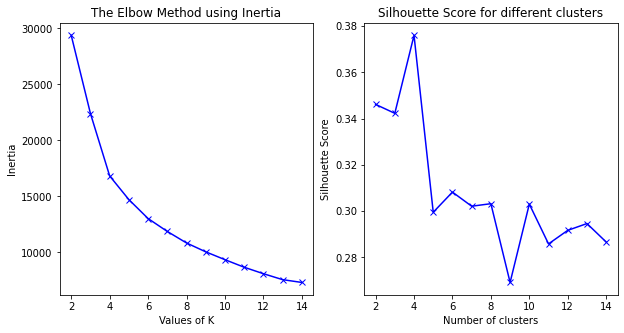

In [64]:
# find 'k' value by Elbow Method
plt.figure(figsize=[10, 8])
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
inertia=[]
silhouette_avg = []

range_val=range(2,15)
for i in range_val:
    kmean=KMeans(n_clusters=i)
    #kmean=OPTICS(min_samples=10)
    kmean.fit_predict(X_final)
    inertia.append(kmean.inertia_)
    silhouette_avg.append(silhouette_score(X_final, kmean.labels_))
axes[0].plot(range_val,inertia,'bx-')
axes[1].plot(range_val,silhouette_avg,'bx-')
axes[0].set_xlabel('Values of K') 
axes[1].set_xlabel('Number of clusters') 
axes[0].set_ylabel('Inertia') 
axes[1].set_ylabel('Silhouette Score') 
axes[0].set_title('The Elbow Method using Inertia') 
axes[1].set_title('Silhouette Score for different clusters') 
plt.show()


### Agglomerative Clustering

In [65]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

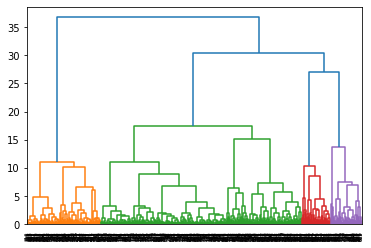

In [66]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

In [67]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [68]:
np.unique(labels)

array([0, 1, 2])

In [74]:
kclusters = 4


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(X)
#kmeans = DBSCAN(min_samples=5,eps=0.25).fit(X)
#optics_model = OPTICS(min_samples=5,eps=0.25).fit(X)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
#optics_model.labels_[0:10]
#np.unique(optics_model.labels_)

array([1, 1, 2, 2, 1, 1, 1, 3, 1, 1], dtype=int32)

In [75]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3], dtype=int32)

In [76]:
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt 

In [77]:
kmeans.labels_.shape

(680,)

In [78]:
df_model['cluster']  = kmeans.labels_

In [79]:
lat=df_model['lat']
lon=df_model['lon']
geoid=df_model['GISJOIN']
cluster = df_model['cluster']

In [80]:
map_clusters = folium.Map(location=cords[0], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lat,lon,geoid,cluster):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster))
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[cluster-1],
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

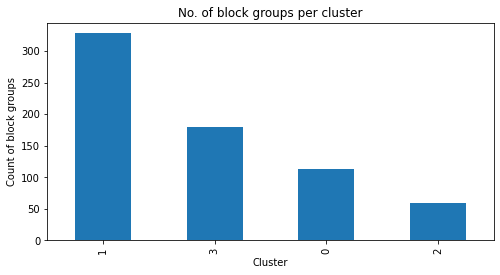

In [85]:
df_model.cluster.value_counts().plot(kind='bar',figsize=(8,4))
plt.title('No. of block groups per cluster')
plt.xlabel('Cluster')
plt.ylabel('Count of block groups')
plt.show()

In [86]:
df_model.shape

(680, 58)

In [87]:
d1 = df_model.groupby(['cluster']).agg({'GISJOIN':'count','Total_Population':'sum','Asian alone':'sum','Indo-Chinese Restaurants Count':'sum'})


In [88]:
d1['avg']=d1['Indo-Chinese Restaurants Count']*100/d1['Total_Population']
d1['avg_per_asian']=d1['Indo-Chinese Restaurants Count']*100/d1['Asian alone']

In [89]:
d1

GISJOIN  Total_Population  Asian alone  \
cluster                                           
0            113            147344        19423   
1            328            363926        40642   
2             59            118002        58418   
3            180            379908        33524   

         Indo-Chinese Restaurants Count       avg  avg_per_asian  
cluster                                                           
0                                5412.0  3.673037      27.863873  
1                                2527.0  0.694372       6.217706  
2                                 799.0  0.677107       1.367729  
3                                 859.0  0.226107       2.562343

In [90]:
cmap='inferno_r'

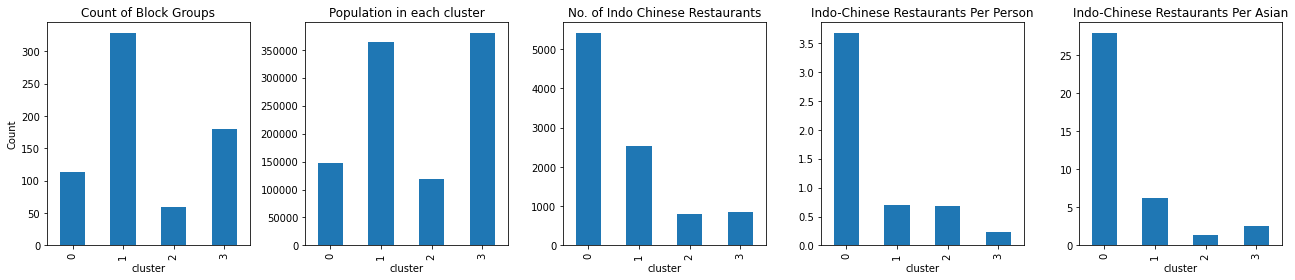

In [94]:
fig,axes=plt.subplots(nrows=1,ncols=5,figsize=(18,4))
d1['GISJOIN'].plot(kind='bar',ax=axes[0])
axes[0].set_title('Count of Block Groups')
d1['Total_Population'].plot(kind='bar',ax=axes[1])
axes[1].set_title('Population in each cluster')
d1['Indo-Chinese Restaurants Count'].plot(kind='bar',ax=axes[2])
axes[2].set_title('No. of Indo Chinese Restaurants')
d1['avg'].plot(kind='bar',ax=axes[3])
axes[3].set_title('Indo-Chinese Restaurants Per Person')
d1['avg_per_asian'].plot(kind='bar',ax=axes[4])
axes[4].set_title('Indo-Chinese Restaurants Per Asian')
axes[0].set_ylabel('Count')
plt.tight_layout()

plt.show()

In [95]:
df_model.shape

(680, 58)

In [96]:
#select the cluster
selected_cluster=2
df_model[df_model.cluster==selected_cluster]

GISJOIN       STATE  STATEA            COUNTY  COUNTYA  TRACTA  \
2     G34000300022001  New Jersey      34     Bergen County        3    2200   
3     G34000300023002  New Jersey      34     Bergen County        3    2300   
11    G34000300070011  New Jersey      34     Bergen County        3    7001   
19    G34000300130024  New Jersey      34     Bergen County        3   13002   
24    G34000300154021  New Jersey      34     Bergen County        3   15402   
44    G34000300280012  New Jersey      34     Bergen County        3   28001   
125   G34001300206005  New Jersey      34      Essex County       13   20600   
138   G34001700009022  New Jersey      34     Hudson County       17     902   
142   G34001700054003  New Jersey      34     Hudson County       17    5400   
155   G34001700158012  New Jersey      34     Hudson County       17   15801   
159   G34001700201001  New Jersey      34     Hudson County       17   20100   
163   G34002300004031  New Jersey      34  Middlesex County       23     403   
167   G34002300006091  New Jersey      34  Middlesex County       23     609   
173   G34002300010042  New Jersey      34  Middlesex County       23    1004   
176   G34002300014111  New Jersey      34  Middlesex County       23    1411   
177   G34002300014142  New Jersey      34  Middlesex County       23    1414   
178   G34002300014151  New Jersey      34  Middlesex County       23    1415   
186   G34002300019011  New Jersey      34  Middlesex County       23    1901   
194   G34002300030021  New Jersey      34  Middlesex County       23    3002   
206   G34002300062041  New Jersey      34  Middlesex County       23    6204   
209   G34002300062082  New Jersey      34  Middlesex County       23    6208   
216   G34002300066041  New Jersey      34  Middlesex County       23    6604   
223   G34002300072022  New Jersey      34  Middlesex County       23    7202   
240   G34002300079132  New Jersey      34  Middlesex County       23    7913   
253   G34002300082144  New Jersey      34  Middlesex County       23    8214   
254   G34002300084031  New Jersey      34  Middlesex County       23    8403   
255   G34002300084034  New Jersey      34  Middlesex County       23    8403   
256   G34002300084051  New Jersey      34  Middlesex County       23    8405   
257   G34002300085012  New Jersey      34  Middlesex County       23    8501   
259   G34002300085022  New Jersey      34  Middlesex County       23    8502   
260   G34002300085023  New Jersey      34  Middlesex County       23    8502   
262   G34002300085041  New Jersey      34  Middlesex County       23    8504   
263   G34002300085042  New Jersey      34  Middlesex County       23    8504   
264   G34002300085053  New Jersey      34  Middlesex County       23    8505   
265   G34002300086011  New Jersey      34  Middlesex County       23    8601   
267   G34002300086023  New Jersey      34  Middlesex County       23    8602   
268   G34002300086044  New Jersey      34  Middlesex County       23    8604   
287   G34002700408031  New Jersey      34     Morris County       27   40803   
300   G34002700416031  New Jersey      34     Morris County       27   41603   
301   G34002700416032  New Jersey      34     Morris County       27   41603   
303   G34002700416053  New Jersey      34     Morris County       27   41605   
304   G34002700417051  New Jersey      34     Morris County       27   41705   
382   G34002700461102  New Jersey      34     Morris County       27   46110   
1635  G36004700094022    New York      36      Kings County       47    9402   
1643  G36004700228001    New York      36      Kings County       47   22800   
1698  G36006100145001    New York      36   New York County       61   14500   
1713  G36008100019021    New York      36     Queens County       81    1902   
1746  G36008100475001    New York      36     Queens County       81   47500   
1763  G36008100797011    New York      36     Queens County       81   79701   
1764  G3600810

In [97]:
selected_cluster_points = df_model[df_model.cluster==selected_cluster][['lat','lon']].values.tolist()

In [99]:
m = folium.Map(location=selected_cluster_points[5])

for point in selected_cluster_points:
    folium.Circle(
        radius=100,
        location=point,
        popup=str(point),#"The Waterfront",
        color="crimson",
        fill=False,).add_to(m)

    folium.CircleMarker(
        location=point,
        radius=10,
        popup=str(point),#"Laurelhurst Park",
        color="#3186cc",
        fill=True,
        fill_color="#3186cc",).add_to(m)


m

In [100]:
df_model[df_model.cluster==selected_cluster].shape

(59, 58)

In [101]:
g1 = df_model[df_model.cluster==selected_cluster]

In [102]:
gdf = gpd.GeoDataFrame(g1, 
            geometry=gpd.points_from_xy(g1.lon, g1.lat),
            crs="+proj=sinu +lon_0=0 +x_0=0 +y_0=0 +a=6371007.181 +b=6371007.181 +units=m +no_defs")
gdf.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
2   G34000300022001  New Jersey      34  Bergen County        3    2200   
3   G34000300023002  New Jersey      34  Bergen County        3    2300   
11  G34000300070011  New Jersey      34  Bergen County        3    7001   
19  G34000300130024  New Jersey      34  Bergen County        3   13002   
24  G34000300154021  New Jersey      34  Bergen County        3   15402   

    BLCK_GRPA  travel_time_<30mins  travel_time_30_to_60_mins  \
2           1                  372                        260   
3           2                  226                         84   
11          1                  456                        378   
19          4                  296                        272   
24          1                  823                        234   

    travel_time_>60_mins  ...  Bus Stop_avg_distance  \
2                    216  ...                    0.0   
3                    194  ...                    0.0   
11                   261  ...                    0.0   
19                   313  ...                 1372.0   
24                   126  ...                 1742.0   

    Metro Station_avg_distance  Public Transportation_avg_distance  \
2                          0.0                              1866.0   
3                          0.0                              1484.0   
11                         0.0                                 0.0   
19                         0.0                              1944.0   
24                         0.0                              1814.0   

    Rail Station_avg_distance  Business_Parks_Count  Total_Population_Race  \
2                         0.0                  10.0                   1708   
3                         0.0                   8.0                   1597   
11                     1289.0                   7.0                   2096   
19                        0.0                  62.0                   1854   
24                        0.0                  31.0                   1957   

    White alone  Asian alone  Indo-Chinese Restaurants Count  cluster  
2           925          760                             4.0        2  
3           779          768                             1.0        2  
11         1248          674                             1.0        2  
19         1173          597                            11.0        2  
24          929          944                             9.0        2  

[5 rows x 58 columns]

In [106]:
four_square_cols = restaurent_cols + transport_fs_cols + business_park_cols 

In [107]:
df_result = df_model[debug_cols+total_population_col+income_group_cols+ mode_of_commute_col +four_square_cols+target][df_model.cluster==selected_cluster]

In [108]:
df_result.head()

GISJOIN       STATE  STATEA         COUNTY  COUNTYA  TRACTA  \
2   G34000300022001  New Jersey      34  Bergen County        3    2200   
3   G34000300023002  New Jersey      34  Bergen County        3    2300   
11  G34000300070011  New Jersey      34  Bergen County        3    7001   
19  G34000300130024  New Jersey      34  Bergen County        3   13002   
24  G34000300154021  New Jersey      34  Bergen County        3   15402   

    BLCK_GRPA   INTPTLAT   INTPTLON  \
2           1  41.013089 -73.950558   
3           2  40.988215 -73.941195   
11          1  40.971892 -73.983554   
19          4  40.845052 -73.964483   
24          1  40.880299 -73.986988   

                                             geometry  ...  Bus Stop_count  \
2   POLYGON ((-73.957093 41.010110999999995, -73.9...  ...             0.0   
3   POLYGON ((-73.958253 40.983616999999995, -73.9...  ...             0.0   
11  POLYGON ((-74.001723 40.9724, -74.001722 40.97...  ...             0.0   
19  POLYGON ((-73.97545099999999 40.82381499999999...  ...             7.0   
24  POLYGON ((-73.994112 40.876512, -73.994073 40....  ...             5.0   

    Metro Station_count  Public Transportation_count  Rail Station_count  \
2                   0.0                          1.0                 0.0   
3                   0.0                          1.0                 0.0   
11                  0.0                          0.0                 1.0   
19                  0.0                          1.0                 0.0   
24                  0.0                          1.0                 0.0   

    Bus Stop_avg_distance  Metro Station_avg_distance  \
2                     0.0                         0.0   
3                     0.0                         0.0   
11                    0.0                         0.0   
19                 1372.0                         0.0   
24                 1742.0                         0.0   

    Public Transportation_avg_distance  Rail Station_avg_distance  \
2                               1866.0                        0.0   
3                               1484.0                        0.0   
11                                 0.0                     1289.0   
19                              1944.0                        0.0   
24                              1814.0                        0.0   

    Business_Parks_Count  Indo-Chinese Restaurants Count  
2                   10.0                             4.0  
3                    8.0                             1.0  
11                   7.0                             1.0  
19                  62.0                            11.0  
24                  31.0                             9.0  

[5 rows x 47 columns]

In [109]:
df_result['restaurant_per_person']=df_result['Indo-Chinese Restaurants Count']/df_result['Total_Population']
df_result['restaurant_per_asian']=df_result['Indo-Chinese Restaurants Count']/df_result['Asian alone']
df_result['identifier']=df_result['COUNTY']+'_T'+df_result['TRACTA'].apply(str)+'_BG'+df_result['BLCK_GRPA'].apply(str)


In [110]:
mode_of_commute_col = ['Total_Working', 'Car, truck, or van', 'Taxicab', 'Motorcycle',
       'Bicycle', 'Walked', 'Other means of transport', 'Worked from home']

In [111]:
import seaborn

In [112]:
sns.set_style('whitegrid')
sns.set_palette('GnBu_d')

In [113]:
df_result.columns

Index(['GISJOIN', 'STATE', 'STATEA', 'COUNTY', 'COUNTYA', 'TRACTA',
       'BLCK_GRPA', 'INTPTLAT', 'INTPTLON', 'geometry', 'lat', 'lon',
       'Total_Population', 'White alone', 'Asian alone', 'income_group_<10k',
       'income_group_10k_to_25k', 'income_group_25k_to_50k',
       'income_group_50k_to_100k', 'income_group_100k_to_200k',
       'income_group_>200k', 'Total_Working', 'Car, truck, or van', 'Taxicab',
       'Motorcycle', 'Bicycle', 'Walked', 'Other means of transport',
       'Worked from home', 'Chinese Restaurant_count',
       'Indian Restaurant_count', 'Italian Restaurant_count',
       'Mexican Restaurant_count', 'Chinese Restaurant_avg_distance',
       'Indian Restaurant_avg_distance', 'Italian Restaurant_avg_distance',
       'Mexican Restaurant_avg_distance', 'Bus Stop_count',
       'Metro Station_count', 'Public Transportation_count',
       'Rail Station_count', 'Bus Stop_avg_distance',
       'Metro Station_avg_distance', 'Public Transportation_avg_distance

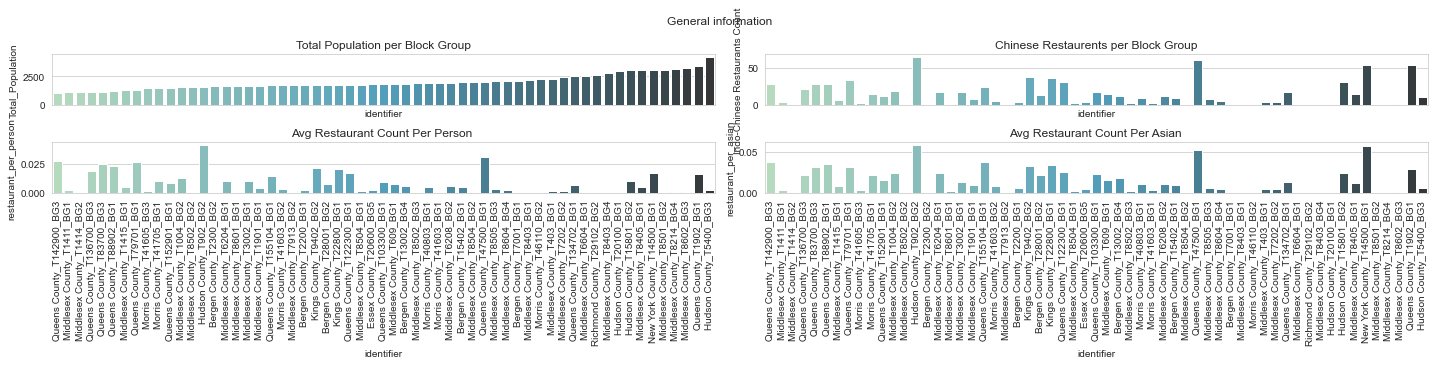

In [114]:
fig,axes= plt.subplots(nrows=2,ncols=2,figsize=(20,5),sharex=True)
sns.barplot(x='identifier',y='Total_Population',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0,0])
sns.barplot(x='identifier',y='Indo-Chinese Restaurants Count',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0,1])
sns.barplot(x='identifier',y='restaurant_per_person',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1,0])
sns.barplot(x='identifier',y='restaurant_per_asian',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1,1])

#axes[0].set_xlabel('Total_Population')
#axes[1].set_xlabel('Chinese Restaurant_count')
#axes[2].set_xlabel('Avg Restaurant Count Per Person ')
axes[0,0].set_title('Total Population per Block Group')
axes[0,1].set_title('Chinese Restaurents per Block Group')
axes[1,0].set_title('Avg Restaurant Count Per Person ')
axes[1,1].set_title('Avg Restaurant Count Per Asian ')
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,1].tick_params(axis='x', rotation=90)
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,1].tick_params(axis='x', rotation=90)
plt.suptitle('General information')
plt.tight_layout()
plt.show()

In [115]:
mode_of_commute_col2 = [i.replace(',','').replace(' ','_') for i in mode_of_commute_col]
md={i:j for i,j in zip(mode_of_commute_col,mode_of_commute_col2)}
df_result = df_result.rename(columns=md)
mode_of_commute_col2

['Total_Working',
 'Car_truck_or_van',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other_means_of_transport',
 'Worked_from_home']

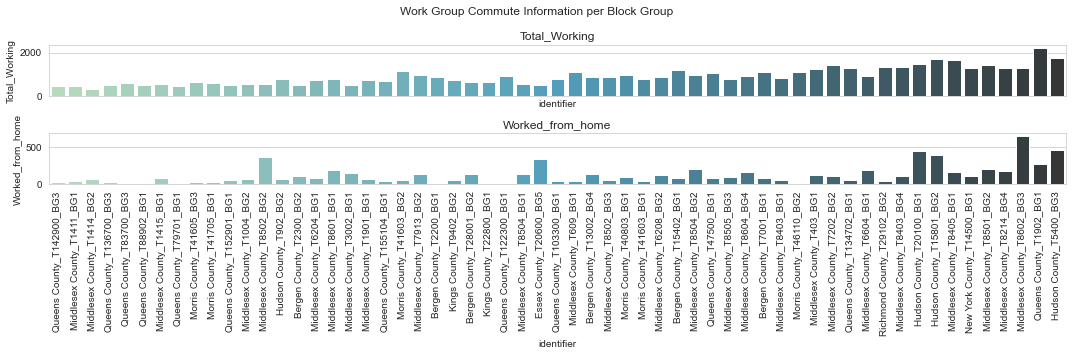

In [116]:
fig,axes= plt.subplots(nrows=2,ncols=1,figsize=(15,5),sharex=True)
sns.barplot(x='identifier',y='Total_Working',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[0])
sns.barplot(x='identifier',y='Worked_from_home',data=df_result.sort_values(by='Total_Population'),palette='GnBu_d',ax=axes[1])

axes[0].set_title('Total_Working')
axes[1].set_title('Worked_from_home')
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
plt.suptitle('Work Group Commute Information per Block Group')
plt.tight_layout()
plt.show()    

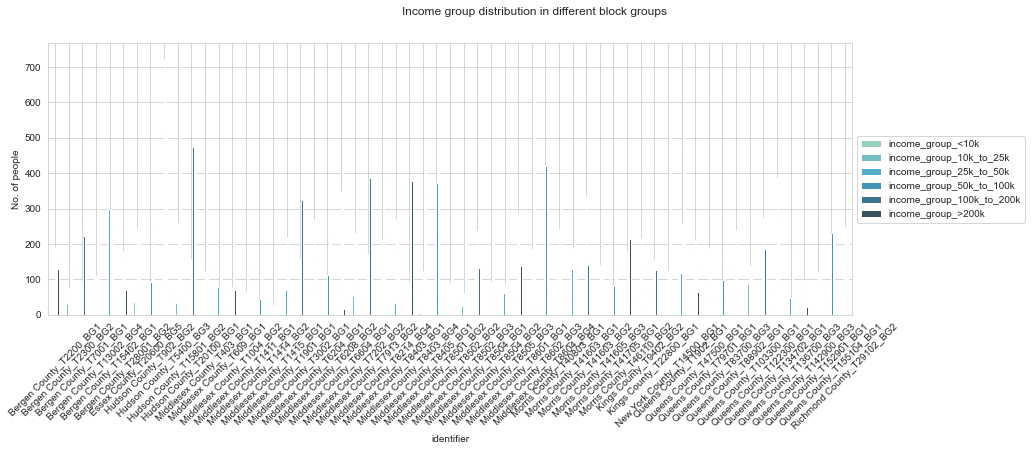

In [117]:
ax = df_result[['identifier']+income_group_cols].set_index('identifier').plot(kind='bar',figsize=(18,5))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.suptitle('Income group distribution in different block groups')
plt.ylabel('No. of people')
plt.xticks(rotation=45)
plt.show()

### Scoring the Block Groups

In [306]:
score_df = df_result[['identifier','restaurant_per_person','restaurant_per_asian','Total_Working','income_group_100k_to_200k']]
score_df['restaurant_per_asian'] = score_df['restaurant_per_asian'].replace(np.inf,0)#*100
scale_cols=score_df.columns[1:]
score_df

identifier  restaurant_per_person  restaurant_per_asian  \
2        Bergen County_T2200_BG1               0.002342              0.005263   
3        Bergen County_T2300_BG2               0.000626              0.001302   
11       Bergen County_T7001_BG1               0.000477              0.001484   
19      Bergen County_T13002_BG4               0.005933              0.018425   
24      Bergen County_T15402_BG1               0.004599              0.009534   
44      Bergen County_T28001_BG2               0.007412              0.021886   
125      Essex County_T20600_BG5               0.002221              0.004854   
138       Hudson County_T902_BG2               0.041009              0.058348   
142      Hudson County_T5400_BG3               0.002366              0.006061   
155     Hudson County_T15801_BG2               0.009852              0.024590   
159     Hudson County_T20100_BG1               0.000000              0.000000   
163    Middlesex County_T403_BG1               0.001745              0.004119   
167    Middlesex County_T609_BG1               0.007576              0.015385   
173   Middlesex County_T1004_BG2               0.012492              0.024675   
176   Middlesex County_T1411_BG1               0.002786              0.003195   
177   Middlesex County_T1414_BG2               0.000915              0.001252   
178   Middlesex County_T1415_BG1               0.004739              0.008011   
186   Middlesex County_T1901_BG1               0.004177              0.009358   
194   Middlesex County_T3002_BG1               0.010180              0.013524   
206   Middlesex County_T6204_BG1               0.010487              0.024148   
209   Middlesex County_T6208_BG2               0.005664              0.011078   
216   Middlesex County_T6604_BG1               0.000391              0.000843   
223   Middlesex County_T7202_BG2               0.001622              0.004920   
240   Middlesex County_T7913_BG2               0.000589              0.000967   
253   Middlesex County_T8214_BG4               0.000315              0.000563   
254   Middlesex County_T8403_BG1               0.000000              0.000000   
255   Middlesex County_T8403_BG4               0.000362              0.001198   
256   Middlesex County_T8405_BG1               0.004592              0.011834   
257   Middlesex County_T8501_BG2               0.000326              0.000624   
259   Middlesex County_T8502_BG2               0.000000              0.000000   
260   Middlesex County_T8502_BG3               0.001074              0.001976   
262   Middlesex County_T8504_BG1               0.001135              0.002545   
263   Middlesex County_T8504_BG2               0.000000              0.000000   
264   Middlesex County_T8505_BG3               0.003406              0.005622   
265   Middlesex County_T8601_BG1               0.000607              0.001783   
267   Middlesex County_T8602_BG3               0.000308              0.000422   
268   Middlesex County_T8604_BG4               0.002413              0.004296   
287     Morris County_T40803_BG1               0.004821              0.010936   
300     Morris County_T41603_BG1               0.001050              0.003053   
301     Morris County_T41603_BG2               0.002943              0.007949   
303     Morris County_T41605_BG3               0.001381              0.003328   
304     Morris County_T41705_BG1               0.009669              0.021572   
382     Morris County_T46110_BG2               0.000000              0.000000   
1635      Kings County_T9402_BG2               0.021600              0.032118   
1643     Kings County_T22800_BG1               0.020513              0.033645   
1698  New York County_T14500_BG1               0.017315              0.056928   
1713     Queens County_T1902_BG1               0.015699              0.029249   
1746    Queens County_T47500_BG1               0.030394              0.052003   
1763    Queens County_T79701_BG1               0.0259

In [307]:
score_normal=score_df.copy()

In [308]:
def scaleColumn(data):
    '''
    normalizing the columns for scoring
    '''
    row_list = data.values.tolist()
    row_min,row_max = min(row_list),max(row_list)
    op=[]
    for i,val in enumerate(row_list):
        op.append((val-row_min)/(row_max-row_min))
    return op

def getScore(data,weights):
    '''
    scoring the rows with weights
    '''
    score = 0
    for key,value in weights.items():
        score = score + data[key]*value
    return score

In [309]:
# normalizing the columns
for col in scale_cols:
    print(col)
    score_df[col]=scaleColumn(score_df[col])

restaurant_per_person
restaurant_per_asian
Total_Working
income_group_100k_to_200k


In [310]:
# reversing the numbers as we need restaurent locations with lower PerPerson restaurant
score_df['restaurant_per_person']=1-score_df['restaurant_per_person']
score_df['restaurant_per_asian']=1-score_df['restaurant_per_asian']

In [311]:

w_dict= {'restaurant_per_asian': 50,
 'restaurant_per_person': 20,
 'Total_Working': 10,
 'income_group_100k_to_200k': 20}
w_dict


{'restaurant_per_asian': 50,
 'restaurant_per_person': 20,
 'Total_Working': 10,
 'income_group_100k_to_200k': 20}

In [312]:
score_df['score']=score_df.apply(getScore,weights=w_dict,axis=1)

In [313]:
score_normal['score']=score_df['score']

In [314]:
score_df.head()

identifier  restaurant_per_person  restaurant_per_asian  \
2    Bergen County_T2200_BG1               0.942893              0.909798   
3    Bergen County_T2300_BG2               0.984731              0.977684   
11   Bergen County_T7001_BG1               0.988366              0.974572   
19  Bergen County_T13002_BG4               0.855323              0.684216   
24  Bergen County_T15402_BG1               0.887858              0.836604   

    Total_Working  income_group_100k_to_200k      score  
2        0.273302                   0.193732  70.955403  
3        0.092154                   0.350427  76.508919  
11       0.403370                   0.274929  78.028201  
19       0.290679                   0.301994  60.263941  
24       0.449710                   0.314815  70.380746

In [315]:
score_normal = score_normal.sort_values(by='score',ascending=False)

In [322]:
score_normal[score_normal.restaurant_per_asian!=0].head()

identifier  restaurant_per_person  restaurant_per_asian  \
257  Middlesex County_T8501_BG2               0.000326              0.000624   
142     Hudson County_T5400_BG3               0.002366              0.006061   
216  Middlesex County_T6604_BG1               0.000391              0.000843   
253  Middlesex County_T8214_BG4               0.000315              0.000563   
240  Middlesex County_T7913_BG2               0.000589              0.000967   

     Total_Working  income_group_100k_to_200k      score  
257           1429                        473  87.748329  
142           1743                        603  87.452072  
216            914                        478  84.959555  
253           1268                        387  84.507760  
240            945                        386  82.298960

In [321]:
score_df.sort_values(by='score',ascending=False).head()

identifier  restaurant_per_person  restaurant_per_asian  \
159    Hudson County_T20100_BG1               1.000000              1.000000   
257  Middlesex County_T8501_BG2               0.992057              0.989302   
142     Hudson County_T5400_BG3               0.942312              0.896131   
216  Middlesex County_T6604_BG1               0.990475              0.985549   
253  Middlesex County_T8214_BG4               0.992320              0.990345   

     Total_Working  income_group_100k_to_200k      score  
159       0.597683                   0.635328  88.683383  
257       0.579252                   0.632479  87.748329  
142       0.744602                   0.817664  87.452072  
216       0.308057                   0.639601  84.959555  
253       0.494471                   0.509972  84.507760

In [318]:
ideal_bg = score_df[score_df.score==score_df.score.max()]['identifier'].values[0]
ideal_gis = df_result[df_result.identifier==ideal_bg]['GISJOIN'].values[0]
ideal_cords = df[df.GISJOIN==ideal_gis][['lat', 'lon']].values.tolist()[0]

In [319]:
 
ideal_location_map = folium.Map(location = ideal_cords,tiles="Stamen Toner",
                                         zoom_start = 12,min_zoom=10,max_zoom=13)
 
# CircleMarker with radius
folium.CircleMarker(location = ideal_cords,
                    radius = 20, popup = ideal_bg,min_zoom=5).add_to(ideal_location_map)
 



#ideal_location_map.fit_bounds(ideal_location_map.get_bounds(), padding=(30, 30))
ideal_location_map

In [320]:
df[df.GISJOIN==ideal_gis].T.rename(columns={517:'Demographics'})

159
GISJOIN                                                                             G34001700201001
STATE                                                                                    New Jersey
STATEA                                                                                           34
COUNTY                                                                                Hudson County
COUNTYA                                                                                          17
TRACTA                                                                                        20100
BLCK_GRPA                                                                                         1
travel_time_<30mins                                                                             261
travel_time_30_to_60_mins                                                                       848
travel_time_>60_mins                                                                            355
income_group_<10k                                                                                13
income_group_10k_to_25k                                                                          59
income_group_25k_to_50k                                                                          98
income_group_50k_to_100k                                                                        157
income_group_100k_to_200k                                                                       475
income_group_>200k                                                                              427
Total_Population                                                                               2978
Total_Working                                                                                  1464
Car, truck, or van                                                                              431
Taxicab                                                                                           0
Motorcycle                                                                                        0
Bicycle                                                                                           0
Walked                                                                                            3
Other means of transport                                                                         32
Worked from home                                                                                442
In labor force                                                                                 2089
In labor force: Civilian labor force                                                           2089
In labor force: Civilian labor force: Employed                                                 1986
In labor force: Civilian labor force: Unemployed                                                103
In labor force: Armed Forces                                                                      0
Not in labor force                                                                              361
INTPTLAT                                                                                  40.765543
INTPTLON                                                                                 -74.082202
geometry                                          POLYGON ((-74.095266 40.754062999999995, -74.0...
lat                                                                                       40.765543
lon                                                                                      -74.082202
Chinese Restaurant_count                                                                        0.0
Indian Restaurant_count                                                                         0.0
Italian Restaurant_count                                                                        2.0
Mexican Restaurant_count                                                                        